1. Importation des bibliothèques

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

2. Chargement des données

In [2]:
df_earthquake = pd.read_csv("earthquakes.csv")

df = df_earthquake.drop(['postcode', 'subnational', 'continent', 'city'], axis=1)


3. Sélection des colonnes numériques

In [3]:
df_numeric_columns = df.select_dtypes(include=['number'])
df_numeric = df[df_numeric_columns.columns]


4. Winsorisation des colonnes numériques

In [ ]:
def winsorized_column(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

for col in df_numeric.columns:
    df_numeric[col] = winsorized_column(df_numeric[col])


In [ ]:
sns.pairplot(df_numeric, hue="magnitude", height=2.5)
plt.suptitle("Pairplot of Numeric Features (Before Training)", y=1.02)
plt.show()

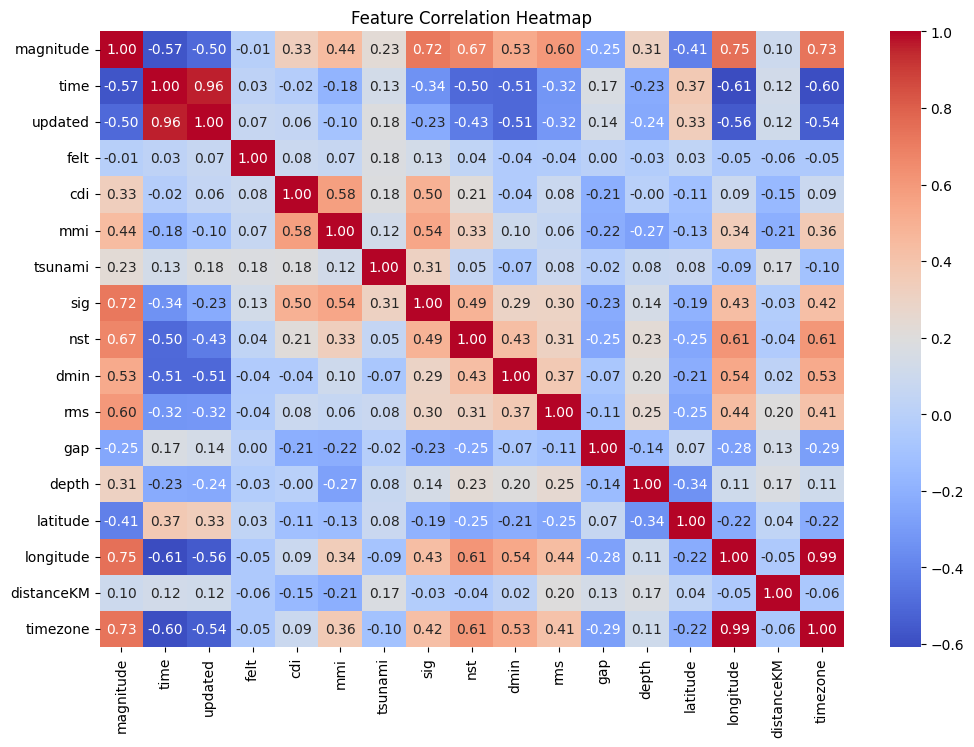

In [4]:
correlation = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


6. Préparation des données pour le modèle

In [5]:
X = df_numeric[['timezone', 'longitude', 'latitude', 'depth', 'rms', 'cdi',
                'mmi', 'tsunami', 'sig', 'nst', 'dmin', 'time', 'updated']]
Y = df_numeric['magnitude']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


7. Construction et entraînement du modèle

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

8. Prédictions et métriques

In [7]:
# Prédictions sur l'ensemble de test
Y_pred = linear_model.predict(X_test)

# Calcul des métriques d'évaluation
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
r2 = r2_score(Y_test, Y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 0.3143208438703856
R² Score: 0.9084475315633228


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9. Importance des caractéristiques

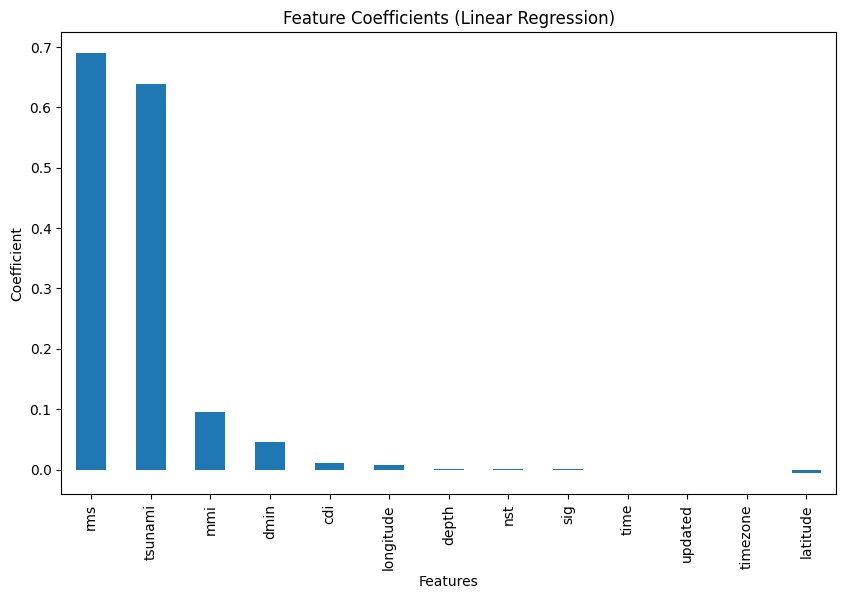

In [8]:
# Visualisation des coefficients de régression
coefficients = pd.Series(linear_model.coef_, index=X.columns)
coefficients.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Feature Coefficients (Linear Regression)")
plt.xlabel("Features")
plt.ylabel("Coefficient")
plt.show()


10. Validation croisée

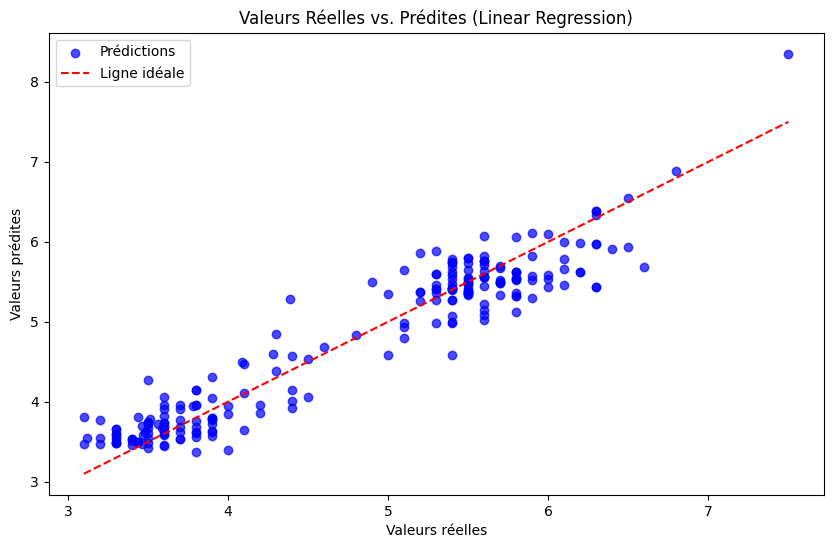

In [9]:
# Visualisation des données réelles vs prédites
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color='blue', label='Prédictions')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', label='Ligne idéale')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Valeurs Réelles vs. Prédites (Linear Regression)")
plt.legend()
plt.show()

11. Fonctions d’évaluation

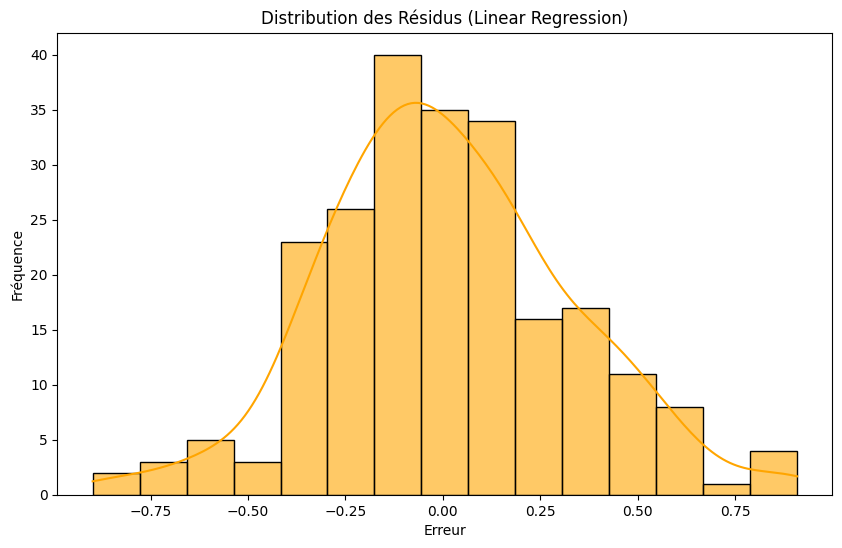

In [10]:
# Analyse des résidus
residuals = Y_test - Y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="orange", alpha=0.6)
plt.title("Distribution des Résidus (Linear Regression)")
plt.xlabel("Erreur")
plt.ylabel("Fréquence")
plt.show()

12. Évaluation des ensembles d’entraînement et de test

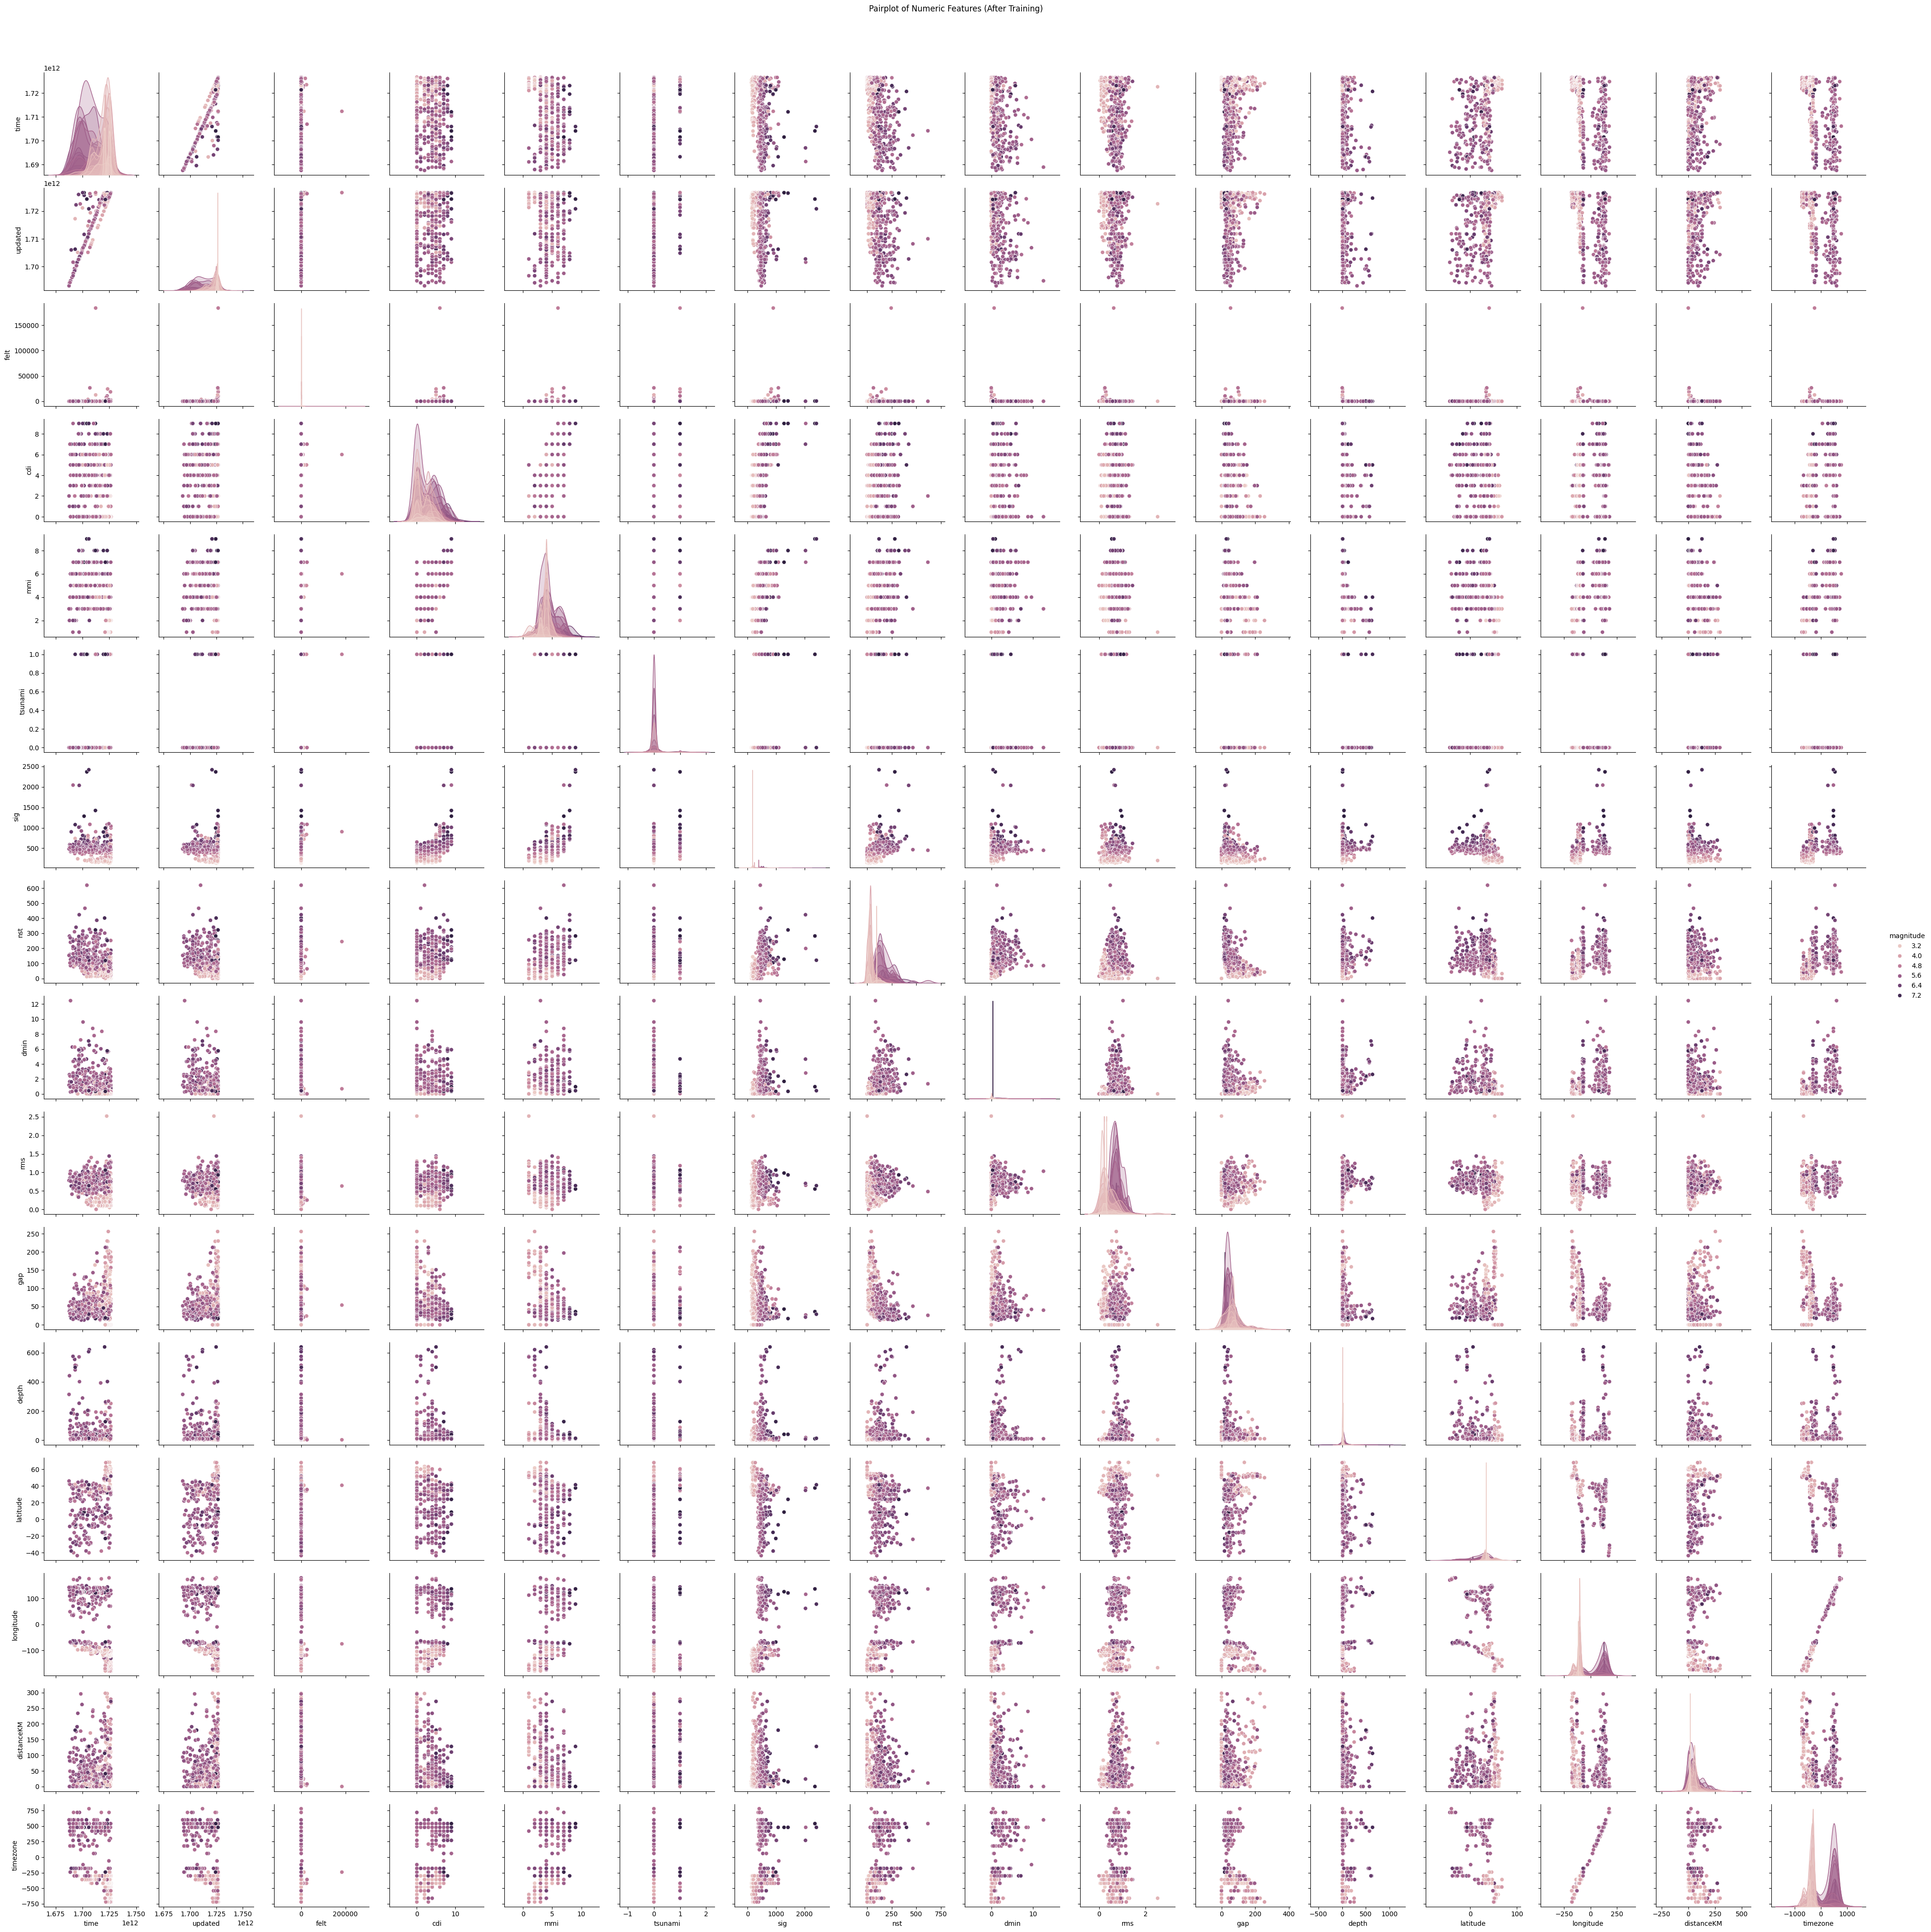

In [12]:

# Pairplot après entraînement
sns.pairplot(df_numeric, hue="magnitude", height=2.5)
plt.suptitle("Pairplot of Numeric Features (After Training)", y=1.02)
plt.show()